In [12]:
pip install idx2numpy

Note: you may need to restart the kernel to use updated packages.


In [13]:
import idx2numpy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from copy import copy
from sklearn.linear_model import LogisticRegression
from numpy import log, dot, e
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsOneClassifier
import joblib

In [3]:
#!cp 'drive/MyDrive/LogRegression.py' .

In [14]:
#Importing logRegression Class
from LogRegression import LogRegression

In [16]:
#Concatenating training image and testing image in image
train_image = idx2numpy.convert_from_file("train-images.idx3-ubyte")
test_image = idx2numpy.convert_from_file("t10k-images.idx3-ubyte")
image = np.concatenate([train_image,test_image])
image.shape

(70000, 28, 28)

In [17]:
#Concatenating training labels and testing labels in labels
train_labels = idx2numpy.convert_from_file("train-labels.idx1-ubyte")
test_labels = idx2numpy.convert_from_file("t10k-labels.idx1-ubyte")
labels = np.concatenate([train_labels,test_labels])
labels.shape

(70000,)

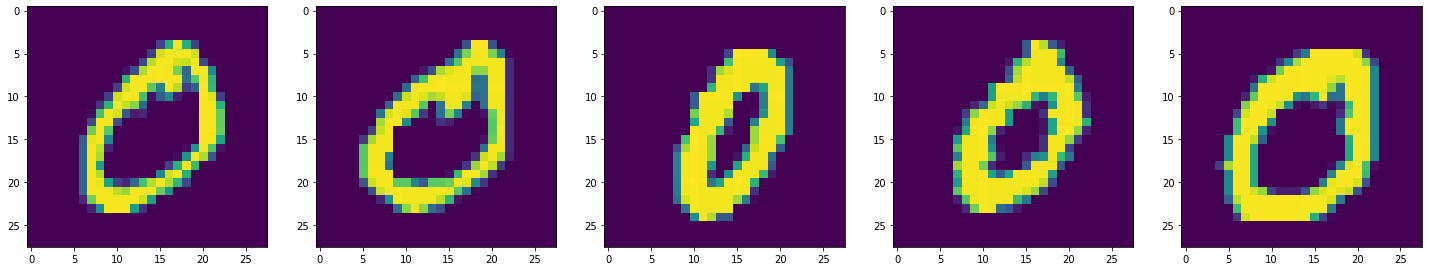

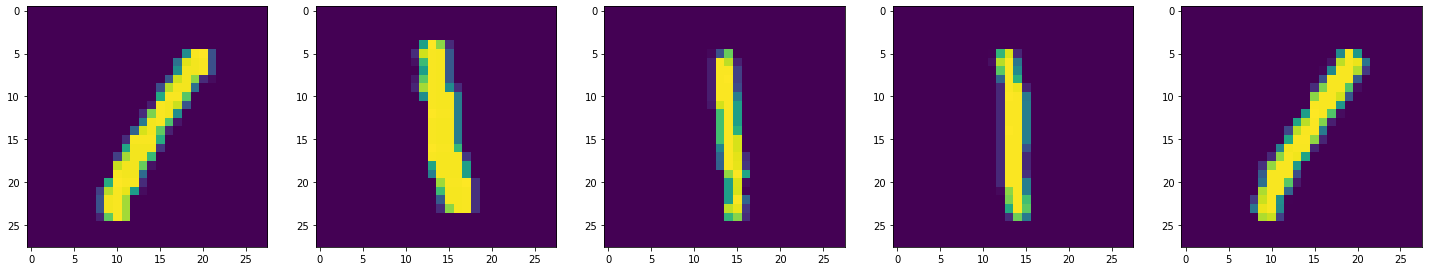

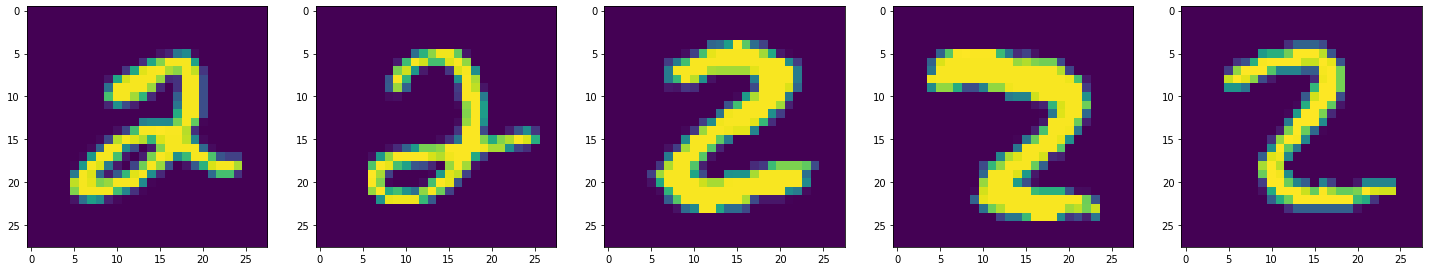

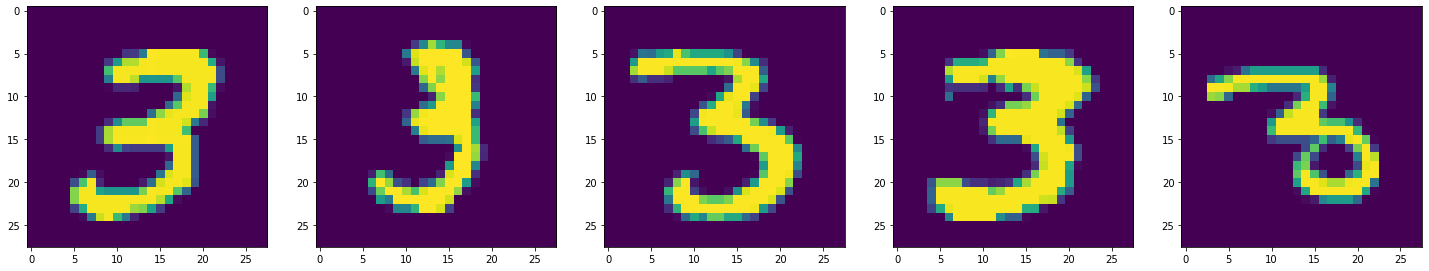

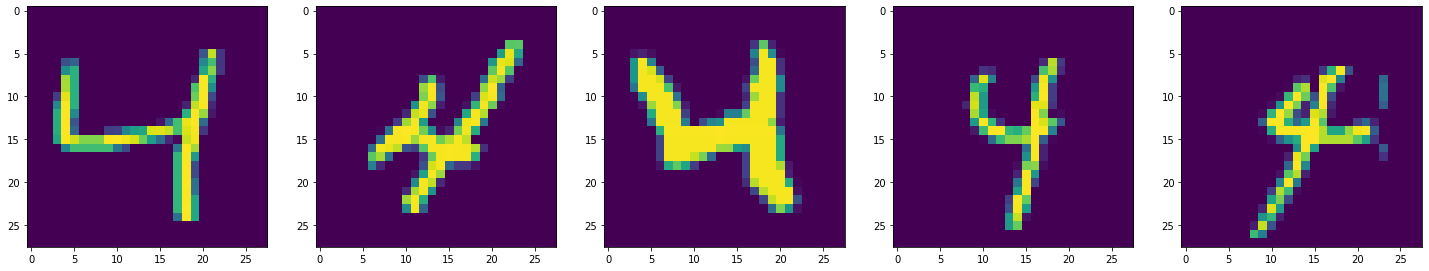

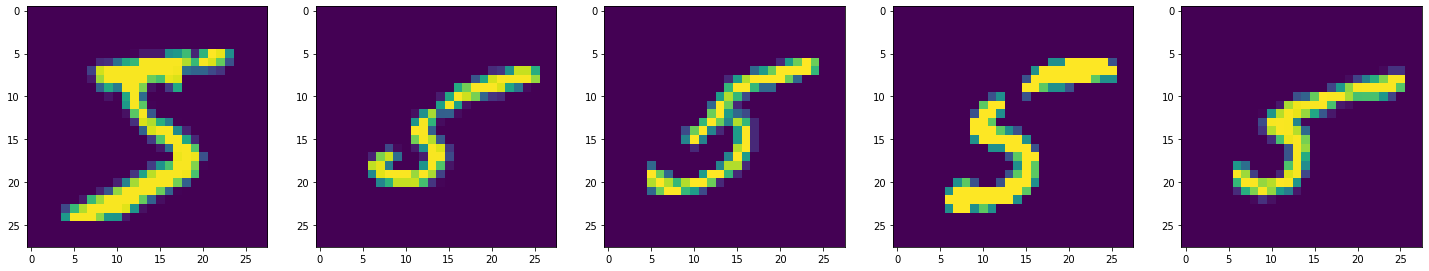

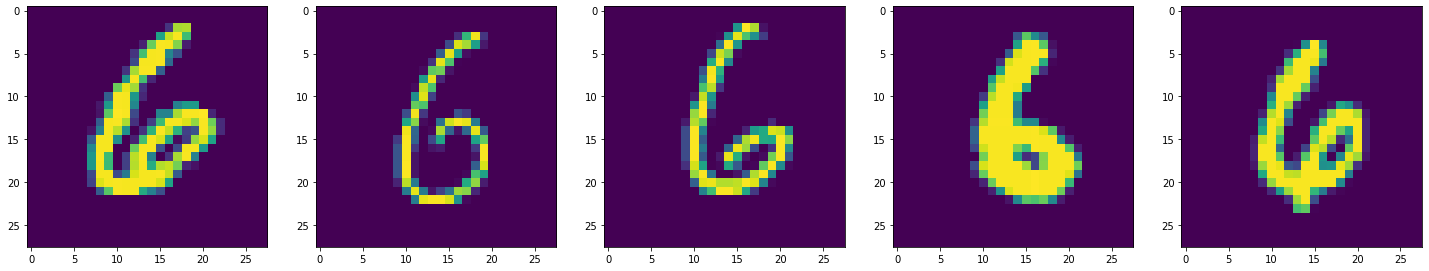

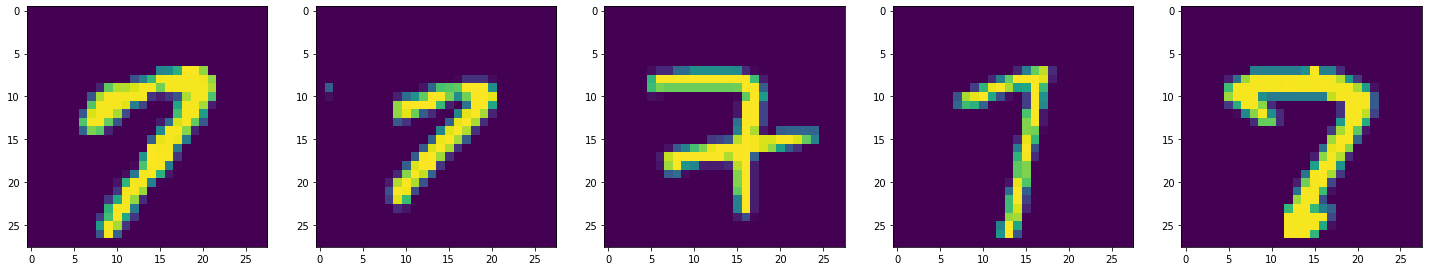

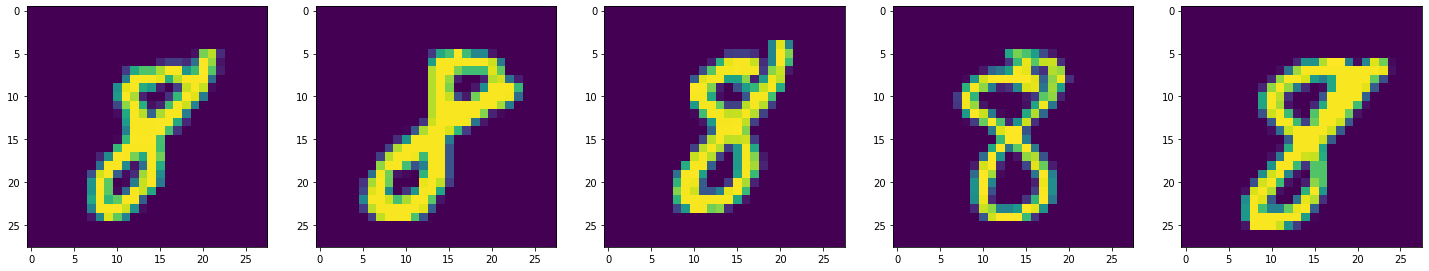

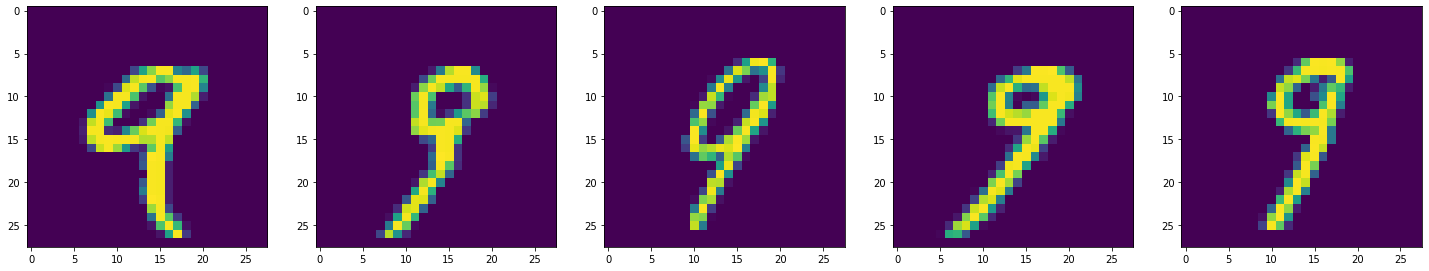

In [49]:
#Visualizing the dataset using 5 instances of each class.

for i in range(0,10,1):
  val =np.where(labels==i)
  fig,ax=plt.subplots(1,5,figsize=(25,5))
  for x in range(0,5,1):
    ax[x].imshow(image[val[0][x]])
  plt.show()

In [18]:
#Flatening the image to get data in proper shape of 2-d
image = image.reshape(image.shape[0],-1)
image.shape

(70000, 784)

In [19]:
#Function used to give n-folds of the given dataframe
def split_n_folds(df,n):
  splitDataframe=[]
  split = int(np.ceil(df.shape[0]/n))
  for x in np.arange(0,df.shape[0],split):
    a=x+split
    splitDataframe.append(df[x:a])
  return splitDataframe

In [20]:
#Calling split_n_folds function to get the 5-folds
data_list = split_n_folds(image,5)
label_list = split_n_folds(labels,5)
data_list[4].shape

(14000, 784)

**OneVsOne**

In [10]:
#Performing multi class classification using one vs one(ovo)

#Lists which will store the accuracy foldwise
n_fold_train_accuracy = []
n_fold_test_accuracy = []

i=0

#Loop to use LogRegression Class on 5-folds to train the model and compute accuracies foldwise and classwise
for x in range(len(data_list)):

  #Making object of LogRegression class, passing the optimal learning rate and multiclassification_type as ovo
  obj_t = LogRegression(multiclassification_type='ovo',learning_rate = 0.00005)

  #Making copy of the data and that will be used furthe
  data = copy(data_list)

  #Splitting the data in training and validation set
  label = copy(label_list)
  test = data.pop(x)
  test_label = label.pop(x)
  train = np.concatenate(data)
  train_label = np.concatenate(label)

  #Fitting the model on training data
  obj_t.fit(train,train_label)

  #Saving the model foldwise
  name = "OVOLogmodel"+str(i)+".sav"
  filename = name
  joblib.dump(obj_t,filename)

  #Predicting the values on training and validation set of the current fold
  trainy_predicted = obj_t.predict(train)
  testy_predicted = obj_t.predict(test)

  #Accuracy computation on training and validation set 
  Train_accuracy = obj_t.accuracy(train_label,trainy_predicted)
  Test_accuracy = obj_t.accuracy(test_label,testy_predicted)

  #Appending the foldwise accuracies in the list
  n_fold_train_accuracy.append(Train_accuracy)
  n_fold_test_accuracy.append(Test_accuracy)

  #Taking unique values from the label
  classes = np.unique(label)
  
  #List which will store classwise accuracy of the current fold
  classvise_accuracy = {}
  for c in classes:
    test_label_c = test_label[test_label==c]
    predicted_label_c = testy_predicted[test_label==c] == c
    class_accuracy = predicted_label_c.sum()/test_label_c.shape[0]
    classvise_accuracy[c] = class_accuracy

  #Printing the current fold  
  print("Fold", i)

  #Pritning classwise accuracy of current fold
  print(classvise_accuracy)

  #Printing the accuracy of current fold
  print('Train accuracy',Train_accuracy,'\n','Test accuracy',Test_accuracy,sep='\t')
  i = i+1

#Printing foldwise accuracy together
print('Train accuracy',n_fold_train_accuracy,'\n','Test accuracy',n_fold_test_accuracy,sep='\t')


Fold 0
{0: 0.9765124555160143, 1: 0.9841068022886205, 2: 0.93050475493782, 3: 0.8947730398899587, 4: 0.9539810080350621, 5: 0.8792822185970636, 6: 0.95908111988514, 7: 0.9413351314902225, 8: 0.8334583645911477, 9: 0.8990694345025053}
Train accuracy	0.9358214285714286	
	Test accuracy	0.9268571428571428
Fold 1
{0: 0.9650557620817843, 1: 0.9735547355473555, 2: 0.9104046242774566, 3: 0.9181124219292158, 4: 0.9344141488577745, 5: 0.86, 6: 0.9543478260869566, 7: 0.9514767932489452, 8: 0.8930957683741648, 9: 0.8905579399141631}
Train accuracy	0.93875	
	Test accuracy	0.9262857142857143
Fold 2
{0: 0.9691313711414213, 1: 0.96375, 2: 0.8853868194842407, 3: 0.922068463219228, 4: 0.9337217771303714, 5: 0.8434022257551669, 6: 0.9424307036247335, 7: 0.9347368421052632, 8: 0.9198529411764705, 9: 0.8946996466431095}
Train accuracy	0.9368214285714286	
	Test accuracy	0.9222857142857143
Fold 3
{0: 0.9826964671953857, 1: 0.975480450629556, 2: 0.9278131634819533, 3: 0.8952054794520548, 4: 0.9473684210526315

Using Saved models for above computations

In [21]:
#Performing multi class classification using one vs one(ovo)

#Lists which will store the accuracy foldwise
n_fold_train_accuracy = []
n_fold_test_accuracy = []

i=0

#Loop to use LogRegression Class on 5-folds to train the model and compute accuracies foldwise and classwise
for x in range(len(data_list)):

  #Making copy of the data and that will be used furthe
  data = copy(data_list)

  #Splitting the data in training and validation set
  label = copy(label_list)
  test = data.pop(x)
  test_label = label.pop(x)
  train = np.concatenate(data)
  train_label = np.concatenate(label)

  #Using saved the model foldwise
  name = "OVOLogmodel"+str(i)+".sav"
  filename = name
  stored_model = joblib.load(filename)

  #Predicting the values on training and validation set of the current fold
  trainy_predicted = stored_model.predict(train)
  testy_predicted = stored_model.predict(test)

  #Accuracy computation on training and validation set 
  Train_accuracy = stored_model.accuracy(train_label,trainy_predicted)
  Test_accuracy = stored_model.accuracy(test_label,testy_predicted)

  #Appending the foldwise accuracies in the list
  n_fold_train_accuracy.append(Train_accuracy)
  n_fold_test_accuracy.append(Test_accuracy)

  #Taking unique values from the label
  classes = np.unique(label)
  
  #List which will store classwise accuracy of the current fold
  classvise_accuracy = {}
  for c in classes:
    test_label_c = test_label[test_label==c]
    predicted_label_c = testy_predicted[test_label==c] == c
    class_accuracy = predicted_label_c.sum()/test_label_c.shape[0]
    classvise_accuracy[c] = class_accuracy

  #Printing the current fold  
  print("Fold",i)

  #Pritning classwise accuracy of current fold
  print(classvise_accuracy)

  #Printing the accuracy of current fold
  #print('Train accuracy',Train_accuracy,'\n','Test accuracy',Test_accuracy,sep='\t')
  i = i+1

#Printing foldwise accuracy together
print('Train accuracy',n_fold_train_accuracy,'\n','Test accuracy',n_fold_test_accuracy,sep='\t')


Fold 0
{0: 0.9765124555160143, 1: 0.9841068022886205, 2: 0.93050475493782, 3: 0.8947730398899587, 4: 0.9539810080350621, 5: 0.8792822185970636, 6: 0.95908111988514, 7: 0.9413351314902225, 8: 0.8334583645911477, 9: 0.8990694345025053}
Fold 1
{0: 0.9650557620817843, 1: 0.9735547355473555, 2: 0.9104046242774566, 3: 0.9181124219292158, 4: 0.9344141488577745, 5: 0.86, 6: 0.9543478260869566, 7: 0.9514767932489452, 8: 0.8930957683741648, 9: 0.8905579399141631}
Fold 2
{0: 0.9691313711414213, 1: 0.96375, 2: 0.8853868194842407, 3: 0.922068463219228, 4: 0.9337217771303714, 5: 0.8434022257551669, 6: 0.9424307036247335, 7: 0.9347368421052632, 8: 0.9198529411764705, 9: 0.8946996466431095}
Fold 3
{0: 0.9826964671953857, 1: 0.975480450629556, 2: 0.9278131634819533, 3: 0.8952054794520548, 4: 0.9473684210526315, 5: 0.8683385579937304, 6: 0.9535740604274134, 7: 0.9243243243243243, 8: 0.8746478873239436, 9: 0.8784284655300222}
Fold 4
{0: 0.9708667152221413, 1: 0.982791586998088, 2: 0.9321678321678322, 3: 

In [22]:
#Calculating  mean of training  accuracy values
training_mean = sum(n_fold_train_accuracy)/len(n_fold_train_accuracy)

#Calculating mean of validation accuracy values
validation_mean = sum(n_fold_test_accuracy)/len(n_fold_test_accuracy)

#Printing the mean value of training and validation 
print('Training mean',training_mean,'validation mean',validation_mean)

Training mean 0.9375821428571429 validation mean 0.9268142857142857


**OneVsRest**

In [ ]:
#Performing ovr on the dataset using LogRegression class

#List which will store the accuracy foldwise
n_fold_train_accuracy = []
n_fold_test_accuracy = []
i=0

#Loop performs ovr on 5-folds data where in every iteration folds would be different
for x in range(len(data_list)):

  #Making object of LogRegression class and passing the learning rate suited for the model
  obj_t = LogRegression(learning_rate = 0.00005)

  #Making the copy of the data
  data = copy(data_list)

  #Splitting the data in training and validation set
  label = copy(label_list)
  test = data.pop(x)
  test_label = label.pop(x)
  train = np.concatenate(data)
  train_label = np.concatenate(label)

  #Calling fit function of LogRegression class which will do fitting according to ovr
  obj_t.fit(train,train_label)

  #Saving the model foldwise
  name = "OVRLogmodel"+str(i)+".sav"
  filename = name
  joblib.dump(obj_t,filename)

  #Predicting values for training and validation data
  trainy_predicted = obj_t.predict(train)
  testy_predicted = obj_t.predict(test)

  #Accuracy computation for training and validation data
  Train_accuracy = obj_t.accuracy(train_label,trainy_predicted)
  Test_accuracy = obj_t.accuracy(test_label,testy_predicted)

  #Appending the accuracy foldwise in the list
  n_fold_train_accuracy.append(Train_accuracy)
  n_fold_test_accuracy.append(Test_accuracy)

  #Storing unique values present in label in classes
  classes = np.unique(label)

  #List which will store classwise accuracy for the current fold
  classwise_accuracy = {}

  #Loop used to compute accuracy for every class present in classes
  for c in classes:
    test_label_c = test_label[test_label==c]
    predicted_label_c = testy_predicted[test_label==c] == c
    class_accuracy = predicted_label_c.sum()/test_label_c.shape[0]
    classwise_accuracy[c] = class_accuracy

  #Printing the current fold   
  print("Fold",i)

  #Printing the classwise accuracy of current fold
  print(classwise_accuracy)

  #Printing the accuracy of current fold
  print('Train accuracy',Train_accuracy,'\n','Test accuracy',Test_accuracy,sep='\t')

  i = i+1
#Printing all the folds accuracy
print('Train accuracy',n_fold_train_accuracy,'\n','Test accuracy',n_fold_test_accuracy,sep='\t')

Fold 0
{0: 0.9864768683274021, 1: 0.9446916719643992, 2: 0.8639356254572056, 3: 0.7730398899587345, 4: 0.918918918918919, 5: 0.831973898858075, 6: 0.8621679827709978, 7: 0.8759271746459879, 8: 0.7516879219804952, 9: 0.7007874015748031}
Train accuracy	0.8581964285714285	
	Test accuracy	0.8525714285714285
Fold 1
{0: 0.9940520446096655, 1: 0.9606396063960639, 2: 0.8554913294797688, 3: 0.8438584316446912, 4: 0.8813559322033898, 5: 0.41846153846153844, 6: 0.8768115942028986, 7: 0.8804500703234881, 8: 0.23979213066072755, 9: 0.031473533619456366}
Train accuracy	0.7128392857142857	
	Test accuracy	0.7048571428571428
Fold 2
{0: 0.9949748743718593, 1: 0.954375, 2: 0.8946991404011462, 3: 0.8120903131828113, 4: 0.8805535324107793, 5: 0.4626391096979332, 6: 0.8727789623312011, 7: 0.8792982456140351, 8: 0.1948529411764706, 9: 0.7074204946996466}
Train accuracy	0.7888571428571428	
	Test accuracy	0.7725
Fold 3
{0: 0.996395097332372, 1: 0.9681908548707754, 2: 0.8669497523000708, 3: 0.8095890410958904, 

Using Saved Models and do the above computations

In [23]:
#Performing ovr on the dataset using LogRegression class

#List which will store the accuracy foldwise
n_fold_train_accuracy = []
n_fold_test_accuracy = []
i=0

#Loop performs ovr on 5-folds data where in every iteration folds would be different
for x in range(len(data_list)):


  #Making the copy of the data
  data = copy(data_list)

  #Splitting the data in training and validation set
  label = copy(label_list)
  test = data.pop(x)
  test_label = label.pop(x)
  train = np.concatenate(data)
  train_label = np.concatenate(label)


  #Using saved the model foldwise
  name = "OVRLogmodel"+str(i)+".sav"
  filename = name
  stored_model = joblib.load(filename)

  #Predicting values for training and validation data
  trainy_predicted = stored_model.predict(train)
  testy_predicted = stored_model.predict(test)

  #Accuracy computation for training and validation data
  Train_accuracy = stored_model.accuracy(train_label,trainy_predicted)
  Test_accuracy = stored_model.accuracy(test_label,testy_predicted)

  #Appending the accuracy foldwise in the list
  n_fold_train_accuracy.append(Train_accuracy)
  n_fold_test_accuracy.append(Test_accuracy)

  #Storing unique values present in label in classes
  classes = np.unique(label)

  #List which will store classwise accuracy for the current fold
  classwise_accuracy = {}

  #Loop used to compute accuracy for every class present in classes
  for c in classes:
    test_label_c = test_label[test_label==c]
    predicted_label_c = testy_predicted[test_label==c] == c
    class_accuracy = predicted_label_c.sum()/test_label_c.shape[0]
    classwise_accuracy[c] = class_accuracy

  #Printing the current fold   
  print("Fold",i)

  #Printing the classwise accuracy of current fold
  print(classwise_accuracy)

  #Printing the accuracy of current fold
  #print('Train accuracy',Train_accuracy,'\n','Test accuracy',Test_accuracy,sep='\t')

  i = i+1
#Printing all the folds accuracy
print('Train accuracy',n_fold_train_accuracy,'\n','Test accuracy',n_fold_test_accuracy,sep='\t')

Fold 0
{0: 0.9864768683274021, 1: 0.9446916719643992, 2: 0.8639356254572056, 3: 0.7730398899587345, 4: 0.918918918918919, 5: 0.831973898858075, 6: 0.8621679827709978, 7: 0.8759271746459879, 8: 0.7516879219804952, 9: 0.7007874015748031}
Fold 1
{0: 0.9940520446096655, 1: 0.9606396063960639, 2: 0.8554913294797688, 3: 0.8438584316446912, 4: 0.8813559322033898, 5: 0.41846153846153844, 6: 0.8768115942028986, 7: 0.8804500703234881, 8: 0.23979213066072755, 9: 0.031473533619456366}
Fold 2
{0: 0.9949748743718593, 1: 0.954375, 2: 0.8946991404011462, 3: 0.8120903131828113, 4: 0.8805535324107793, 5: 0.4626391096979332, 6: 0.8727789623312011, 7: 0.8792982456140351, 8: 0.1948529411764706, 9: 0.7074204946996466}
Fold 3
{0: 0.996395097332372, 1: 0.9681908548707754, 2: 0.8669497523000708, 3: 0.8095890410958904, 4: 0.8851000741289844, 5: 0.05329153605015674, 6: 0.8717759764185704, 7: 0.8614864864864865, 8: 0.2035211267605634, 9: 0.017790956263899184}
Fold 4
{0: 0.9905316824471959, 1: 0.9674952198852772, 

In [24]:
#Calculating  mean of training  accuracy values
training_mean = sum(n_fold_train_accuracy)/len(n_fold_train_accuracy)

#Calculating mean of validation accuracy values
validation_mean = sum(n_fold_test_accuracy)/len(n_fold_test_accuracy)

#Printing the mean value of training and validation 
print('Training mean',training_mean,'validation mean',validation_mean)

Training mean 0.7709964285714286 validation mean 0.7660428571428571


Sklearn OVR logistic Regression

In [ ]:
#Performing ovr using sklearn logistic regression class

#Lists which will store the accuracy foldwise
n_fold_train_accuracy = []
n_fold_test_accuracy = []
i=0

#Loop which will do computation foldwise using sklearn logistic regression
for x in range(len(data_list)):

  #Object of sklearn logistic regression using ovr for multi class classificatiom
  logreg = LogisticRegression(multi_class='ovr')

  #Copying the data on which every computation will be done
  data = copy(data_list)

  #Splitting data into training and validation 
  label = copy(label_list)
  test = data.pop(x)
  test_label = label.pop(x)
  train = np.concatenate(data)
  train_label = np.concatenate(label)

  #Fitting the model on training data
  logreg.fit(train,train_label)

  #Saving the model foldwise
  name = "SKlearnOVRLogmodel"+str(i)+".sav"
  filename = name
  joblib.dump(logreg,filename)

  #Predicting values for training and validation data
  trainy_predicted = logreg.predict(train)
  testy_predicted = logreg.predict(test)

  #Accuracy computation for training and validation set
  Train_accuracy = accuracy_score(train_label,trainy_predicted)
  Test_accuracy = accuracy_score(test_label,testy_predicted)

  #Appending all the foldwise accuracy in the list
  n_fold_train_accuracy.append(Train_accuracy)
  n_fold_test_accuracy.append(Test_accuracy)

  #Taking unique values present in label 
  classes = np.unique(label)

  #List which will be use to store the classwise accuracy
  classvise_accuracy = {}

  #Loop to compute the classwise accuracy
  for c in classes:
    test_label_c = test_label[test_label==c]
    predicted_label_c = testy_predicted[test_label==c] == c
    class_accuracy = predicted_label_c.sum()/test_label_c.shape[0]
    classvise_accuracy[c] = class_accuracy

  #Printing the fold number  
  print("Fold",i)

  #Printing classwise accuracy for current fold
  print(classvise_accuracy)
  i = i+1

#Printing overall accuracy of the folds in the list  
print('Train accuracy',n_fold_train_accuracy,'\n','Test accuracy',n_fold_test_accuracy,sep='\t')

Fold 0
{0: 0.9722419928825623, 1: 0.9726636999364272, 2: 0.8814923189465984, 3: 0.8851444291609354, 4: 0.9327976625273923, 5: 0.8433931484502447, 6: 0.9583632447954056, 7: 0.9238031018206339, 8: 0.8492123030757689, 9: 0.8976377952755905}
Fold 1
{0: 0.9650557620817843, 1: 0.9704797047970479, 2: 0.884393063583815, 3: 0.9000693962526024, 4: 0.9204126750184229, 5: 0.8676923076923077, 6: 0.9434782608695652, 7: 0.9423347398030942, 8: 0.8648849294729027, 9: 0.8855507868383404}
Fold 2
{0: 0.95908111988514, 1: 0.965625, 2: 0.8911174785100286, 3: 0.8783685360524399, 4: 0.9162418062636563, 5: 0.8441971383147854, 6: 0.9417199715707179, 7: 0.9185964912280702, 8: 0.8669117647058824, 9: 0.8706713780918728}
Fold 3
{0: 0.9790915645277577, 1: 0.9715043074884029, 2: 0.8952583156404812, 3: 0.8582191780821918, 4: 0.9140103780578206, 5: 0.8409090909090909, 6: 0.9594694178334562, 7: 0.9087837837837838, 8: 0.8633802816901408, 9: 0.8791697553743514}
Fold 4
{0: 0.9715950473415877, 1: 0.9834289356277884, 2: 0.89

Using saved models for SKlearn ovr

In [ ]:
#Performing ovr using sklearn logistic regression class

#Lists which will store the accuracy foldwise
n_fold_train_accuracy = []
n_fold_test_accuracy = []
i=0

#Loop which will do computation foldwise using sklearn logistic regression
for x in range(len(data_list)):

  #Copying the data on which every computation will be done
  data = copy(data_list)

  #Splitting data into training and validation 
  label = copy(label_list)
  test = data.pop(x)
  test_label = label.pop(x)
  train = np.concatenate(data)
  train_label = np.concatenate(label)

  #Using saved the model foldwise
  name = "SKlearnOVRLogmodel"+str(i)+".sav"
  filename = name
  stored_model = joblib.load(filename)

  #Predicting values for training and validation data
  trainy_predicted = stored_model.predict(train)
  testy_predicted = stored_model.predict(test)

  #Accuracy computation for training and validation set
  Train_accuracy = accuracy_score(train_label,trainy_predicted)
  Test_accuracy = accuracy_score(test_label,testy_predicted)

  #Appending all the foldwise accuracy in the list
  n_fold_train_accuracy.append(Train_accuracy)
  n_fold_test_accuracy.append(Test_accuracy)

  #Taking unique values present in label 
  classes = np.unique(label)

  #List which will be use to store the classwise accuracy
  classvise_accuracy = {}

  #Loop to compute the classwise accuracy
  for c in classes:
    test_label_c = test_label[test_label==c]
    predicted_label_c = testy_predicted[test_label==c] == c
    class_accuracy = predicted_label_c.sum()/test_label_c.shape[0]
    classvise_accuracy[c] = class_accuracy

  #Printing the fold number  
  print("Fold",i)

  #Printing classwise accuracy for current fold
  print(classvise_accuracy)
  i = i+1

#Printing overall accuracy of the folds in the list  
print('Train accuracy',n_fold_train_accuracy,'\n','Test accuracy',n_fold_test_accuracy,sep='\t')

Fold 0
{0: 0.9722419928825623, 1: 0.9726636999364272, 2: 0.8814923189465984, 3: 0.8851444291609354, 4: 0.9327976625273923, 5: 0.8433931484502447, 6: 0.9583632447954056, 7: 0.9238031018206339, 8: 0.8492123030757689, 9: 0.8976377952755905}
Fold 1
{0: 0.9650557620817843, 1: 0.9704797047970479, 2: 0.884393063583815, 3: 0.9000693962526024, 4: 0.9204126750184229, 5: 0.8676923076923077, 6: 0.9434782608695652, 7: 0.9423347398030942, 8: 0.8648849294729027, 9: 0.8855507868383404}
Fold 2
{0: 0.95908111988514, 1: 0.965625, 2: 0.8911174785100286, 3: 0.8783685360524399, 4: 0.9162418062636563, 5: 0.8441971383147854, 6: 0.9417199715707179, 7: 0.9185964912280702, 8: 0.8669117647058824, 9: 0.8706713780918728}
Fold 3
{0: 0.9790915645277577, 1: 0.9715043074884029, 2: 0.8952583156404812, 3: 0.8582191780821918, 4: 0.9140103780578206, 5: 0.8409090909090909, 6: 0.9594694178334562, 7: 0.9087837837837838, 8: 0.8633802816901408, 9: 0.8791697553743514}
Fold 4
{0: 0.9715950473415877, 1: 0.9834289356277884, 2: 0.89

In [ ]:
#Calculating  mean of training  accuracy values
training_mean = sum(n_fold_train_accuracy)/len(n_fold_train_accuracy)

#Calculating mean of validation accuracy values
validation_mean = sum(n_fold_test_accuracy)/len(n_fold_test_accuracy)

#Printing the mean value of training and validation 
print('Training mean',training_mean,'validation mean',validation_mean)

Training mean 0.9274357142857141 validation mean 0.9133714285714285


SKlearn OVO 

In [ ]:
#List which will store foldwise accuracies
n_fold_train_accuracy = []
n_fold_test_accuracy = []

i=0

for x in range(len(data_list)):

  #Making logistic regression of sklearn object
  logreg = LogisticRegression()  

  #Copying the data and that will be used further
  data = copy(data_list)

  #Splitting the data into training and validation 
  label = copy(label_list)
  test = data.pop(x)
  test_label = label.pop(x)
  train = np.concatenate(data)
  train_label = np.concatenate(label)

  #Using OneVSOneClassifier which will take the object of LogisticRegression class
  ovo = OneVsOneClassifier(logreg)

  #Model is fitted on training data
  ovo.fit(train, train_label)

  #Saving the model foldwise
  name = "SKlearnOVOLogmodel"+str(i)+".sav"
  filename = name
  joblib.dump(ovo,filename)

  #Predicted values are determined for training and validation data
  trainy_predicted = ovo.predict(train)
  testy_predicted = ovo.predict(test)

  #Accuracy Score is computed
  Train_accuracy = accuracy_score(train_label,trainy_predicted)
  Test_accuracy = accuracy_score(test_label,testy_predicted)

  #Appending the accuracy score foldwise in the lists
  n_fold_train_accuracy.append(Train_accuracy)
  n_fold_test_accuracy.append(Test_accuracy)

  #Getting unique classes present in the label
  classes = np.unique(label)

  #List will store classwise accuracy of the current fold
  classvise_accuracy = {}
  for c in classes:
    test_label_c = test_label[test_label==c]
    predicted_label_c = testy_predicted[test_label==c] == c
    class_accuracy = predicted_label_c.sum()/test_label_c.shape[0]
    classvise_accuracy[c] = class_accuracy

  print("Fold",i)

  #Printing the classwise accuracy
  print(classvise_accuracy)
  i = i+1

#Printing foldwise accuracy  
print('Train accuracy',n_fold_train_accuracy,'\n','Test accuracy',n_fold_test_accuracy,sep='\t')

Fold 0
{0: 0.9701067615658363, 1: 0.9732994278448824, 2: 0.8895391367959035, 3: 0.9016506189821183, 4: 0.9401022644265887, 5: 0.8768352365415987, 6: 0.9583632447954056, 7: 0.9359406608226568, 8: 0.8829707426856714, 9: 0.9105225483178239}
Fold 1
{0: 0.9591078066914498, 1: 0.97539975399754, 2: 0.9147398843930635, 3: 0.9021512838306731, 4: 0.9189388356669123, 5: 0.8730769230769231, 6: 0.95, 7: 0.9430379746835443, 8: 0.8864142538975501, 9: 0.8791130185979972}
Fold 2
{0: 0.9440057430007178, 1: 0.964375, 2: 0.9032951289398281, 3: 0.8929351784413693, 4: 0.9257101238164603, 5: 0.8823529411764706, 6: 0.9282160625444208, 7: 0.9326315789473684, 8: 0.9102941176470588, 9: 0.8840989399293286}
Fold 3
{0: 0.9682768565248738, 1: 0.9721669980119284, 2: 0.9221514508138712, 3: 0.8732876712328768, 4: 0.927353595255745, 5: 0.8793103448275862, 6: 0.9469417833456153, 7: 0.927027027027027, 8: 0.8725352112676056, 9: 0.8776871756856931}
Fold 4
{0: 0.9643117261471231, 1: 0.9770554493307839, 2: 0.920979020979021, 

Using saved model to do above computations

In [ ]:
#List which will store foldwise accuracies
n_fold_train_accuracy = []
n_fold_test_accuracy = []

i=0

for x in range(len(data_list)):

  #Copying the data and that will be used further
  data = copy(data_list)

  #Splitting the data into training and validation 
  label = copy(label_list)
  test = data.pop(x)
  test_label = label.pop(x)
  train = np.concatenate(data)
  train_label = np.concatenate(label)


  #Using saved the model foldwise
  name = "SKlearnOVOLogmodel"+str(i)+".sav"
  filename = name
  stored_model = joblib.load(filename)
  

  #Predicted values are determined for training and validation data
  trainy_predicted = stored_model.predict(train)
  testy_predicted = stored_model.predict(test)

  #Accuracy Score is computed
  Train_accuracy = accuracy_score(train_label,trainy_predicted)
  Test_accuracy = accuracy_score(test_label,testy_predicted)

  #Appending the accuracy score foldwise in the lists
  n_fold_train_accuracy.append(Train_accuracy)
  n_fold_test_accuracy.append(Test_accuracy)

  #Getting unique classes present in the label
  classes = np.unique(label)

  #List will store classwise accuracy of the current fold
  classvise_accuracy = {}
  for c in classes:
    test_label_c = test_label[test_label==c]
    predicted_label_c = testy_predicted[test_label==c] == c
    class_accuracy = predicted_label_c.sum()/test_label_c.shape[0]
    classvise_accuracy[c] = class_accuracy

  print("Fold",i)

  #Printing the classwise accuracy
  print(classvise_accuracy)
  i = i+1

#Printing foldwise accuracy  
print('Train accuracy',n_fold_train_accuracy,'\n','Test accuracy',n_fold_test_accuracy,sep='\t')

Fold 0
{0: 0.9701067615658363, 1: 0.9732994278448824, 2: 0.8895391367959035, 3: 0.9016506189821183, 4: 0.9401022644265887, 5: 0.8768352365415987, 6: 0.9583632447954056, 7: 0.9359406608226568, 8: 0.8829707426856714, 9: 0.9105225483178239}
Fold 1
{0: 0.9591078066914498, 1: 0.97539975399754, 2: 0.9147398843930635, 3: 0.9021512838306731, 4: 0.9189388356669123, 5: 0.8730769230769231, 6: 0.95, 7: 0.9430379746835443, 8: 0.8864142538975501, 9: 0.8791130185979972}
Fold 2
{0: 0.9440057430007178, 1: 0.964375, 2: 0.9032951289398281, 3: 0.8929351784413693, 4: 0.9257101238164603, 5: 0.8823529411764706, 6: 0.9282160625444208, 7: 0.9326315789473684, 8: 0.9102941176470588, 9: 0.8840989399293286}
Fold 3
{0: 0.9682768565248738, 1: 0.9721669980119284, 2: 0.9221514508138712, 3: 0.8732876712328768, 4: 0.927353595255745, 5: 0.8793103448275862, 6: 0.9469417833456153, 7: 0.927027027027027, 8: 0.8725352112676056, 9: 0.8776871756856931}
Fold 4
{0: 0.9643117261471231, 1: 0.9770554493307839, 2: 0.920979020979021, 

In [ ]:
#Calculating  mean of training  accuracy values
training_mean = sum(n_fold_train_accuracy)/len(n_fold_train_accuracy)

#Calculating mean of validation accuracy values
validation_mean = sum(n_fold_test_accuracy)/len(n_fold_test_accuracy)

#Printing the mean value of training and validation 
print('Training mean',training_mean,'validation mean',validation_mean)

Training mean 0.9759 validation mean 0.9224
